# EXAMEN - PARTE 1

## EJERCICIO 1

Utiliza el modelo de mezcla gaussiana para identificar los clústeres en los datos del fichero blobs_data.csv. 

Utiliza el modelo de mezcla gaussiana para identificar los clústeres. Para elegir el número de grupos representa en una gráfica BIC y AIC para diferente número de grupos.

Representa gráficamente los clústeres (cada uno de un color) y pinta también los centros.

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

import sklearn
#from sklearn.datasets import make_blobs

#df = pd.read_csv("Recursos/regresion_3variables.csv")

make_blobs = pd.read_csv("Recursos/blobs_data.csv")

# Generate some data

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

#Generar algunos datos



TypeError: 'DataFrame' object is not callable

## EJERCICIO 2

En este ejercicio, trabajarás con un conjunto de datos de pruebas creados (regresion_3variables.csv). 

Tu objetivo es construir un modelo de regresión que pueda predecir con precisión la variable dependiente y a partir de las variables independientes x1, x2 y x3. 

Deberás:
* Cargar los datos
* Visualizar gráficamente los datos (x1 respecto a y, x2 respecto a y e x3 respecto a y)
* Dividir los datos en conjunto de entrenamiento y pruebas
* Probar diferentes modelos de regresión polinómica, hasta ver cuál es el mejor degree (y explicarlo gráficamente y por medida del error en los conjuntos de entrenamiento y pruebas), no hace falta que uses validación cruzada. ¿Qué medición has usado para evaluar el modelo y por qué? ¿cuál es el mejor degree?
* Probar ahora con Elastic Net, optimizando los hiperparámetros con búsqueda exhaustiva, ¿ha mejorado con esta regularización? ¿cuáles son los mejores datos para los hiperparámetros?

In [1]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

df = pd.read_csv("Recursos/regresion_3variables.csv")
df

,x1,x2,x3,y
0,1.764052,2.111925,1.389910,0.002057
1,0.400157,2.784948,-0.146916,-3.725535
2,0.978738,0.155370,-1.171731,4.292311
3,2.240893,1.209428,-0.622555,4.605692
4,1.867558,1.456107,-2.816283,-3.974116
...,...,...,...,...
995,0.412871,1.195502,-1.755835,-2.036931
996,-0.198399,3.803047,1.669339,-10.280984
997,0.094192,1.316868,-1.045859,-0.743652
998,-1.147611,-1.283803,1.365632,6.981642


In [10]:
df.info

<bound method DataFrame.info of            x1        x2        x3          y
0    1.764052  2.111925  1.389910   0.002057
1    0.400157  2.784948 -0.146916  -3.725535
2    0.978738  0.155370 -1.171731   4.292311
3    2.240893  1.209428 -0.622555   4.605692
4    1.867558  1.456107 -2.816283  -3.974116
..        ...       ...       ...        ...
995  0.412871  1.195502 -1.755835  -2.036931
996 -0.198399  3.803047  1.669339 -10.280984
997  0.094192  1.316868 -1.045859  -0.743652
998 -1.147611 -1.283803  1.365632   6.981642
999 -0.358114 -1.621941 -2.219203   8.490745

[1000 rows x 4 columns]>

In [11]:
df.describe

<bound method NDFrame.describe of            x1        x2        x3          y
0    1.764052  2.111925  1.389910   0.002057
1    0.400157  2.784948 -0.146916  -3.725535
2    0.978738  0.155370 -1.171731   4.292311
3    2.240893  1.209428 -0.622555   4.605692
4    1.867558  1.456107 -2.816283  -3.974116
..        ...       ...       ...        ...
995  0.412871  1.195502 -1.755835  -2.036931
996 -0.198399  3.803047  1.669339 -10.280984
997  0.094192  1.316868 -1.045859  -0.743652
998 -1.147611 -1.283803  1.365632   6.981642
999 -0.358114 -1.621941 -2.219203   8.490745

[1000 rows x 4 columns]>

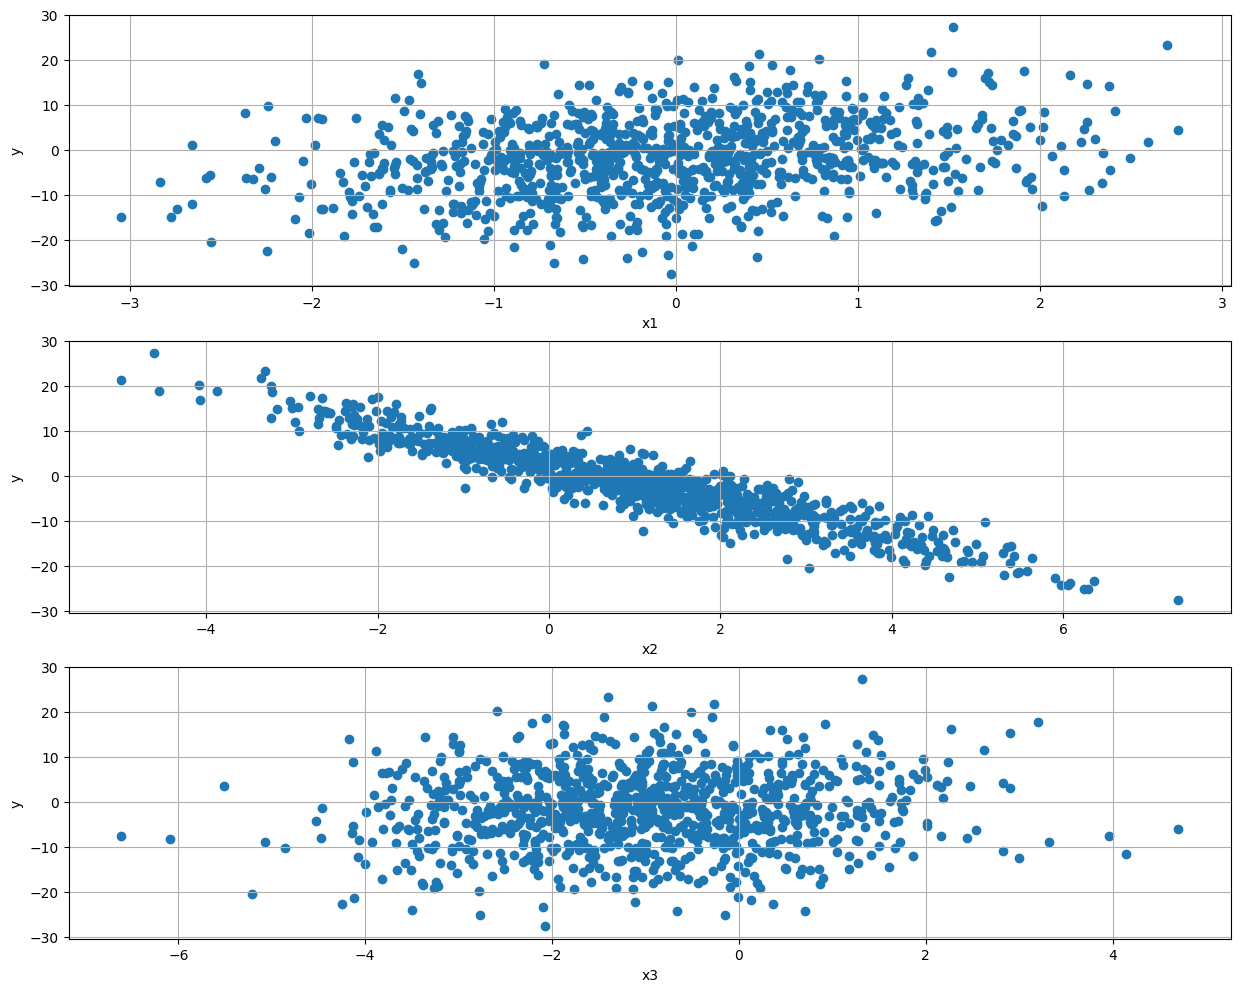

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)

plt.scatter(df["x1"], df["y"])
plt.xlabel("x1")
plt.ylabel("y")
plt.grid()

plt.subplot(3, 1, 2)

plt.scatter(df["x2"], df["y"])
plt.xlabel("x2")
plt.ylabel("y")
plt.grid()

plt.subplot(3, 1, 3)

plt.scatter(df["x3"], df["y"])
plt.xlabel("x3")
plt.ylabel("y")
plt.grid()


plt.show()

In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.15, random_state=5)

In [6]:
X_train = train_set.drop("y", axis=1)
y_train = train_set["y"].copy()

X_test = test_set.drop("y", axis=1)
y_test = test_set["y"].copy()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression_1 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=1, include_bias=False),
    LinearRegression())

polynomial_regression_2 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression())

polynomial_regression_3 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression())

polynomial_regression_4 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=4, include_bias=False),
    LinearRegression())

polynomial_regression_5 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=5, include_bias=False),
    LinearRegression())


In [12]:
from sklearn.metrics import mean_squared_error

degrees = [1,2,3,4,5]
train_error = []
test_error = []

polynomial_regression_1.fit(X_train, y_train)
train_error.append(mean_squared_error(y_train, polynomial_regression_1.predict(X_train)))
test_error.append(mean_squared_error(y_test, polynomial_regression_1.predict(X_test)))

polynomial_regression_2.fit(X_train, y_train)
train_error.append(mean_squared_error(y_train, polynomial_regression_2.predict(X_train)))
test_error.append(mean_squared_error(y_test, polynomial_regression_2.predict(X_test)))

polynomial_regression_3.fit(X_train, y_train)
train_error.append(mean_squared_error(y_train, polynomial_regression_3.predict(X_train)))
test_error.append(mean_squared_error(y_test, polynomial_regression_3.predict(X_test)))

polynomial_regression_4.fit(X_train, y_train)
train_error.append(mean_squared_error(y_train, polynomial_regression_4.predict(X_train)))
test_error.append(mean_squared_error(y_test, polynomial_regression_4.predict(X_test)))

polynomial_regression_5.fit(X_train, y_train)
train_error.append(mean_squared_error(y_train, polynomial_regression_4.predict(X_train)))
test_error.append(mean_squared_error(y_test, polynomial_regression_4.predict(X_test)))

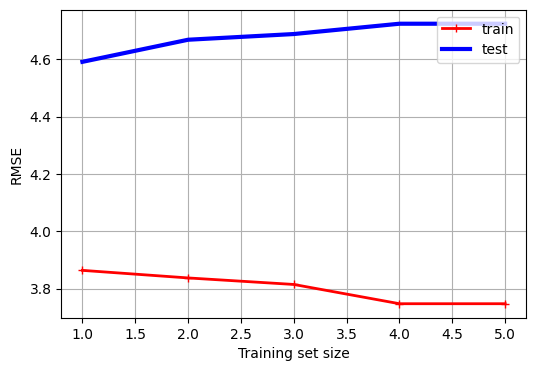

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(degrees, train_error, "r-+", linewidth=2, label="train")
plt.plot(degrees, test_error, "b-", linewidth=3, label="test")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.show()

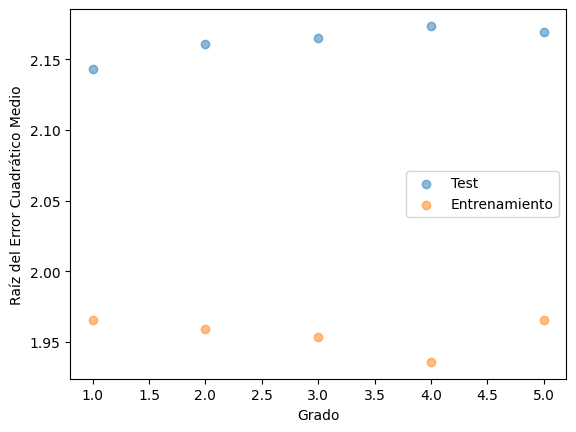

In [14]:
from math import sqrt

polynomial_regression_1.fit(X_train, y_train)
ECM1_train = mean_squared_error(y_train,polynomial_regression_1.predict(X_train))
ECM1 = mean_squared_error(y_test, polynomial_regression_1.predict(X_test))

polynomial_regression_2.fit(X_train, y_train)
ECM2_train = mean_squared_error(y_train,polynomial_regression_2.predict(X_train))
ECM2 = mean_squared_error(y_test, polynomial_regression_2.predict(X_test))

polynomial_regression_3.fit(X_train, y_train)
ECM3_train = mean_squared_error(y_train,polynomial_regression_3.predict(X_train))
ECM3 = mean_squared_error(y_test, polynomial_regression_3.predict(X_test))

polynomial_regression_4.fit(X_train, y_train)
ECM4_train = mean_squared_error(y_train,polynomial_regression_4.predict(X_train))
ECM4 = mean_squared_error(y_test, polynomial_regression_4.predict(X_test))

polynomial_regression_5.fit(X_train, y_train)
ECM5_train = mean_squared_error(y_train,polynomial_regression_1.predict(X_train))
ECM5 = mean_squared_error(y_test, polynomial_regression_5.predict(X_test))

degrees = [1, 2, 3, 4, 5]
RECMs_train = [sqrt(ECM1_train), sqrt(ECM2_train), sqrt(ECM3_train), sqrt(ECM4_train), sqrt(ECM5_train)]
RECMs = ([sqrt(ECM1), sqrt(ECM2), sqrt(ECM3), sqrt(ECM4), sqrt(ECM5)])

plt.scatter(x = degrees,
            y = RECMs,
            label = "Test",
            alpha=0.5)

plt.scatter(x = degrees,
            y = RECMs_train,
            label = "Entrenamiento",
            alpha=0.5)

plt.xlabel("Grado")
plt.ylabel("Raíz del Error Cuadrático Medio")
plt.legend()
plt.show()

In [18]:
print(RECMs)

#print(RECMs_train)


[2.142785855562558, 2.160714391707917, 2.165316210620174, 2.173613110626266, 2.169319688369067]
[1.9655963977229347, 1.9588656195440404, 1.9530485114454885, 1.9357491749709728, 1.9655963977229347]


Para regresión, la diferencia entre el valor real y el predicho elmejor método es el Error Cuadrático Medio o la Raíz del Error Cuadrático Medio. El grado con menor RECM es el mejor, 4 en este caso para el conjunto de entrenamiento.

In [30]:
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic_net = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=5)
)


parametros_EN = {
    "elasticnet__alpha": [0.0001, 0.001, 0.1, 1, 10],
    "elasticnet__l1_ratio": [0.01, 0.25, 0.5, 0.75, 0.99]
}

modelo_EN = make_pipeline(
    StandardScaler(),
    ElasticNet(random_state=5)
)

# Antes he utilizado el RECM pero aquí el scoring es el valor negativo del RECM, ya que cuanto menor sea el RECM mejor, pero como Sklearn tiene la filosofía cuanto mayor el score mejor, se utiliza el negativo.
busqueda_exhaustiva_2 = GridSearchCV(modelo_EN, parametros_EN, scoring="neg_root_mean_squared_error")
busqueda_exhaustiva_2.fit(X_train, y_train)

print()

print('Score: ', sqrt(mean_squared_error(y_test, busqueda_exhaustiva_2.best_estimator_.predict(X_test))))
print('Mejores parámetros: ', busqueda_exhaustiva_2.best_params_)


Score:  2.1428483612762745
Mejores parámetros:  {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.75}


Con los hiperparámetros sale practicamente igual.

## EJERCICIO 3

Carga el conjunto de datos Breast Cancer desde scikit-learn, este conjunto de datos tiene 30 marcadores a partir de los cuales predecir si estamos ante un caso benigno (1) o maligno (0). 

Explora exhaustivamente los datos y divide el conjunto de datos en entrenamiento y pruebas (10% para las pruebas).

Crea un pipeline para preparar los datos y aplicar un algoritmo de máquinas de vector soporte, entrena el modelo (optimiza los hiperparámetros) y evalúa el modelo en el conjunto de pruebas.

Crea un pipeline para preparar los datos y aplicar PCA que explique al menos el 95% de la varianza, aplica esta pipeline al conjunto de entrenamiento y al conjunto de pruebas.

Muestra cuantas dimensiones tenías al principio y cuantas después de aplicar PCA.

Aplica a los datos obtenido de aplicar PCA el algoritmo de máquinas de vector soporte, entrena el modelo (ajusta otra vez los hiperparámetros y guarda el tiempo que tardas en entrenar el modelo) y evalúa el modelo en el conjunto de pruebas.

Compara el error y el tiempo empleado en los dos modelos (sin pca y con pca) e interpreta el resultado.

In [53]:
import sklearn
from sklearn.datasets import load_breast_cancer


dataset = load_breast_cancer(as_frame=True)
X, y = dataset.data, dataset.target


dataset



{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [60]:
list(dataset.target_names)

['malignant', 'benign']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

In [58]:
# Entrenamiento del modelo SVC
from sklearn.svm import SVC
modelo_SVC = make_pipeline(
    StandardScaler(),
    SVC(random_state=5)
)

%time modelo_SVC.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 20.9 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=5))])

In [59]:
# Evaluación del modelo
from sklearn.metrics import precision_score
precision_score(y_test, modelo_SVC.predict(X_test), average="macro", zero_division=0.0)

0.9605263157894737

In [65]:
# Reduccion de dimensionalidad con PCA
from sklearn.decomposition import PCA

red_PCA = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.95, random_state=5)
)

# Aplicamos la reduccion a los conjuntos de entrenamiento y prueba.
X_train_red = red_PCA.fit_transform(X_train)
X_test_red = red_PCA.transform(X_test)

print("antes:", X_train.shape)
print("despues:", X_train_red.shape)

antes: (512, 30)
despues: (512, 10)


In [62]:
X.shape[1]

30

In [63]:
red_PCA.named_steps["pca"].n_components_

10

In [67]:
# Nuevo modelo para dataset reducido
modelo_SVC_red = make_pipeline(
    SVC(random_state=5)
)

%time modelo_SVC_red.fit(X_train_red, y_train)

CPU times: total: 0 ns
Wall time: 8.01 ms


Pipeline(steps=[('svc', SVC(random_state=5))])

In [66]:
# Evaluación
precision_score(y_test, modelo_SVC_red.predict(X_test_red), average="macro")

0.9465811965811965

El tiempo de entrenamiento se ha reducido 8.42 ms frente a 20.9 ms y el rendimiento. Aplicando la reducción de dimensionalidad a un conjunto se pueden obtener rendimientos similares en mucho menos tiempo.

# EXAMEN - PARTE 2

## EJERCICIO 4

Predice las ventas y los gastos mensuales de una cadena de tiendas minoristas para el próximo mes, teniendo en cuenta los 10 últimos meses anteriores.

Pasos a seguir:

* Preparación de Datos:
    * Cargar los datos históricos de ventas y gastos (retail_sales.csv).
    * Gráfica de las ventas y los gastos a lo largo del tiempo.
    * Normalizar los datos (normaliza y desnormaliza los datos manualmente)
    * Dividir los datos en conjuntos de entrenamiento, validación y pruebas.
    * Crear secuencias de datos de longitud fija para entrenar la red.

* Construcción del modelo:   
    * Utilizar una Red Neuronal Recurrente (RNN) con celdas LSTM (mínimo 2 capas)
    * Añadir una capa densa al final para la predicción de las ventas y los gastos

* Entrena el modelo utilizando la detención temprana

* Evaluación y predicción:
    * Evaluar el modelo en el conjunto de prueba para verificar su rendimiento.
    * Realizar predicciones de las ventas y los gastos para el próximo mes (abril)
   
Nota: si te fijas en los datos es muy fácil predecir el resultado para abril, comprueba que los resultados que obtienes concuerdan con lo esperado para estar seguro de que está bien hecho.

In [77]:
import pandas as pd

# Carga de datos
df_ventas = pd.read_csv("Recursos/retail_sales.csv").set_index("Month") # Ponemos como índice el mes
df_ventas

,Sales,Expenses
Month,,
2014-01-01,1000,500
2014-02-01,2000,400
2014-03-01,3000,300
2014-04-01,4000,200
2014-05-01,1000,100
...,...,...
2023-11-01,3000,200
2023-12-01,4000,100
2024-01-01,1000,500


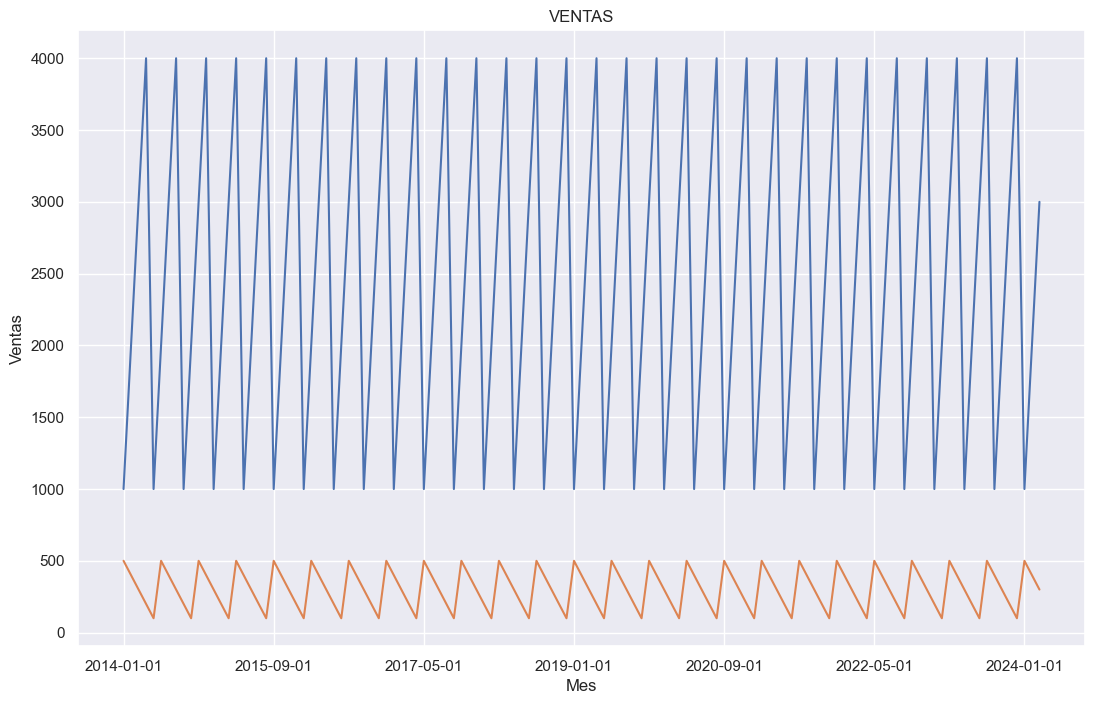

In [78]:
import matplotlib.pyplot as plt

# Gráfico
df_ventas.plot(legend=False, figsize=(13, 8), grid=True)
plt.title("VENTAS")
plt.ylabel("Ventas")
plt.xlabel("Mes")
plt.show()

In [79]:
# Normalización
media = df.mean()
std = df.std()

df2 = (df - media) / std
df2.max()

df_ventas

,Sales,Expenses
Month,,
2014-01-01,-1.329723,500
2014-02-01,-0.435975,400
2014-03-01,0.457774,300
2014-04-01,1.351522,200
2014-05-01,-1.329723,100
...,...,...
2023-11-01,0.457774,200
2023-12-01,1.351522,100
2024-01-01,-1.329723,500


In [110]:
import warnings
warnings.simplefilter('ignore')

train = df2["2014-01":"2019-12"]
valid = df2["2020-01":"2022-12"]
test = df2["2021-01":]

valid


,Sales,Expenses
Month,,
2020-01-01,-1.329723,300
2020-02-01,-0.435975,200
2020-03-01,0.457774,100
2020-04-01,1.351522,500
2020-05-01,-1.329723,400
2020-06-01,-0.435975,300
2020-07-01,0.457774,200
2020-08-01,1.351522,100
2020-09-01,-1.329723,500


In [145]:
import tensorflow as tf

def to_windows(dataset, length):
    dataset = dataset.window(length, shift=1, drop_remainder=True)
    return dataset.flat_map(lambda window_ds: window_ds.batch(length))

def to_seq2seq_dataset(series, seq_length=24, ahead=12, target_col=1,
                       batch_size=32, shuffle=False, seed=None):
    ds = to_windows(tf.data.Dataset.from_tensor_slices(series), ahead + 1)
    ds = to_windows(ds, seq_length).map(lambda S: (S[:, 0], S[:, 1:]))
    if shuffle:
        ds = ds.shuffle(8 * batch_size, seed=seed)
    return ds.batch(batch_size)

In [146]:
seq2seq_train = to_seq2seq_dataset(train.to_numpy(dtype="float32"), shuffle=True, seed=42)
seq2seq_valid = to_seq2seq_dataset(valid.to_numpy(dtype="float32"))
seq2seq_test = to_seq2seq_dataset(test.to_numpy(dtype="float32"))

In [151]:
tf.random.set_seed(42)
seq2seq_model = tf.keras.Sequential([
    tf.keras.layers.GRU(132, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.GRU(132, return_sequences=True),
    tf.keras.layers.Dense(12)
])

In [152]:

def fit_and_evaluate(model, train_set, valid_set, epochs=500):
    early_stopping_cb = tf.keras.callbacks.EarlyStopping( monitor="val_mse", patience=50, restore_best_weights=True)
    model.compile(loss="mse", optimizer="adam", metrics=["mse"])
    model.fit(train_set, validation_data=valid_set, epochs=epochs, callbacks=[early_stopping_cb])
    _, valid_mse = model.evaluate(valid_set)
    return valid_mse 

In [156]:

fit_and_evaluate(seq2seq_model, seq2seq_train, seq2seq_valid)



Epoch 1/500


ValueError: in user code:

    File "c:\Users\icjardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\icjardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\icjardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\icjardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\icjardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\icjardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_21' (type Sequential).
    
    Input 0 of layer "gru_24" is incompatible with the layer: expected shape=(None, None, 1), found shape=(None, None, 2)
    
    Call arguments received by layer 'sequential_21' (type Sequential):
      • inputs=tf.Tensor(shape=(None, None, 2), dtype=float32)
      • training=True
      • mask=None


In [ ]:
test_loss, test_mse = seq2seq_model.evaluate(seq2seq_test)
print(f"Test mse: {test_mse}")

In [ ]:
data = {'Month': ['2024-04-01', '2024-05-01'], 'Sales': [0.,0.]}

df_predict = pd.DataFrame(data, columns=['Month',"Sales"])
df_predict['Month'] = pd.to_datetime(df_predict['Month'])
df_predict.set_index("Month", inplace=True)

df_predict

In [ ]:
# seq2seq_predict = to_seq2seq_dataset(valid.to_numpy(dtype="float32"))
X = df_predict.to_numpy(dtype="float32")[np.newaxis, :12]
predictions = seq2seq_model.predict(X)[0, -1]
predictions

In [ ]:
# predictions2 = predictions(lambda x: (x + x.mean()) * x.std(), axis=0)
predictions_desnormalizado = []
for pred in predictions:
    predictions_desnormalizado.append((pred * media) + std)
predictions_desnormalizado

## EJERCICIO 5
Usa el modelo SSD MobileNet v2 para la detección de objetos en la imagen detección_objetos.

El resultado que espero es el siguiente:

![Imagen con la el resultado que se quiere obtener](Datos/deteccion_objetos_resultado.jpg)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pathlib
import cv2
import math
from PIL import Image
from google.protobuf import text_format
import platform



# Loads the module from internet, unpacks it and initializes a Tensorflow saved model.
def load_model(model_name):
    model_url = 'http://download.tensorflow.org/models/object_detection/' + model_name + '.tar.gz'
    
    model_dir = tf.keras.utils.get_file(
        fname=model_name, 
        origin=model_url,
        untar=True,
        cache_dir=pathlib.Path('.tmp').absolute()
    )
    model = tf.saved_model.load(model_dir + '/saved_model')
    
    return model

MODEL_NAME = 'ssdlite_mobilenet_v2_coco_2018_05_09'
saved_model = load_model(MODEL_NAME)

# Exploring model signatures.
saved_model.signatures

# Loading default model signature.
model = saved_model.signatures['serving_default']

from protos import string_int_label_map_pb2

def load_labels(labels_name):
    labels_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/' + labels_name
    
    labels_path = tf.keras.utils.get_file(
        fname=labels_name, 
        origin=labels_url,
        cache_dir=pathlib.Path('.tmp').absolute()
    )
    
    labels_file = open(labels_path, 'r')
    labels_string = labels_file.read()
    
    labels_map = string_int_label_map_pb2.StringIntLabelMap()
    try:
        text_format.Merge(labels_string, labels_map)
    except text_format.ParseError:
        labels_map.ParseFromString(labels_string)
    
    labels_dict = {}
    for item in labels_map.item:
        labels_dict[item.id] = item.display_name
    
    return labels_dict

def display_image(image_np):
    plt.figure()
    plt.imshow(image_np)


TEST_IMAGES_DIR_PATH = pathlib.Path('Recursos/deteccion_objetos.webp')
TEST_IMAGE_PATHS = sorted(list(TEST_IMAGES_DIR_PATH.glob('*.webp')))
TEST_IMAGE_PATHS

def detect_objects_on_image(image, model):
    image = np.asarray(image)
    input_tensor = tf.convert_to_tensor(image)
    # Adding one more dimension since model expect a batch of images.
    input_tensor = input_tensor[tf.newaxis, ...]

    output_dict = model(input_tensor)

    num_detections = int(output_dict['num_detections'])
    output_dict = {
        key:value[0, :num_detections].numpy() 
        for key,value in output_dict.items()
        if key != 'num_detections'
    }
    output_dict['num_detections'] = num_detections
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
    
    return output_dict

def draw_detections_on_image(image, detections, labels):
    image_with_detections = image
    width, height, channels = image_with_detections.shape
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (0, 255, 0)
    label_padding = 5
    
    num_detections = detections['num_detections']
    if num_detections > 0:
        for detection_index in range(num_detections):
            detection_score = detections['detection_scores'][detection_index]
            detection_box = detections['detection_boxes'][detection_index]
            detection_class = detections['detection_classes'][detection_index]
            detection_label = labels[detection_class]
            detection_label_full = detection_label + ' ' + str(math.floor(100 * detection_score)) + '%'
            
            y1 = int(width * detection_box[0])
            x1 = int(height * detection_box[1])
            y2 = int(width * detection_box[2])
            x2 = int(height * detection_box[3])
                        
            # Detection rectangle.    
            image_with_detections = cv2.rectangle(
                image_with_detections,
                (x1, y1),
                (x2, y2),
                color,
                3
            )
            
            # Label background.
            label_size = cv2.getTextSize(
                detection_label_full,
                cv2.FONT_HERSHEY_COMPLEX,
                0.7,
                2
            )
            image_with_detections = cv2.rectangle(
                image_with_detections,
                (x1, y1 - label_size[0][1] - 2 * label_padding),
                (x1 + label_size[0][0] + 2 * label_padding, y1),
                color,
                -1
            )
            
            # Label text.
            cv2.putText(
                image_with_detections,
                detection_label_full,
                (x1 + label_padding, y1 - label_padding),
                font,
                0.7,
                (0, 0, 0),
                1,
                cv2.LINE_AA
            )
            
    return image_with_detections


for image_path in TEST_IMAGE_PATHS:
    image_np = np.array(Image.open(image_path))
    detections = detect_objects_on_image(image_np, model)
    image_with_detections = draw_detections_on_image(image_np, detections, labels)
    plt.figure(figsize=(8, 6))
    plt.imshow(image_with_detections)


## EJERCICIO 6

Aplica segmentación de objetos a la imagen segmentacion_objetos.webp